In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10], engine='python',parse_dates=['date'], skipinitialspace=True, index_col=0)
df 

,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
date,,,,,,,,,,
2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0


In [4]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
pm25,1706.0,18.96,12.30,1.00,10.00,15.00,24.00,97.00
pm10,1764.0,32.74,16.10,0.00,21.00,28.00,40.00,128.00
o3,1701.0,26.29,11.83,0.50,17.00,24.96,34.22,81.57
no2,1454.0,16.44,8.46,0.35,10.22,14.35,21.13,60.52
co,1247.0,1.73,35.40,0.00,0.35,0.55,0.84,1250.00
avgT,1695.0,30.24,1.76,16.60,29.30,30.30,31.30,35.10
humid,1765.0,73.93,8.26,32.00,69.00,74.00,79.00,97.00
pressure-monthly,1765.0,1008.48,2.13,1004.94,1006.53,1008.20,1010.15,1012.61
windDir,1735.0,188.91,85.55,0.00,120.00,190.00,250.00,360.00
windSpd,1737.0,8.07,2.61,1.00,6.00,8.00,9.00,24.00


In [5]:
dd = df.drop(['pm10', 'o3', 'no2', 'co', 'avgT', 'humid', 'pressure-monthly','windDir','windSpd',],axis = 1)
dd.head()

,pm25
date,
2018-01-01,21.0
2018-01-02,26.0
2018-01-03,38.0
2018-01-04,39.0
2018-01-05,51.0


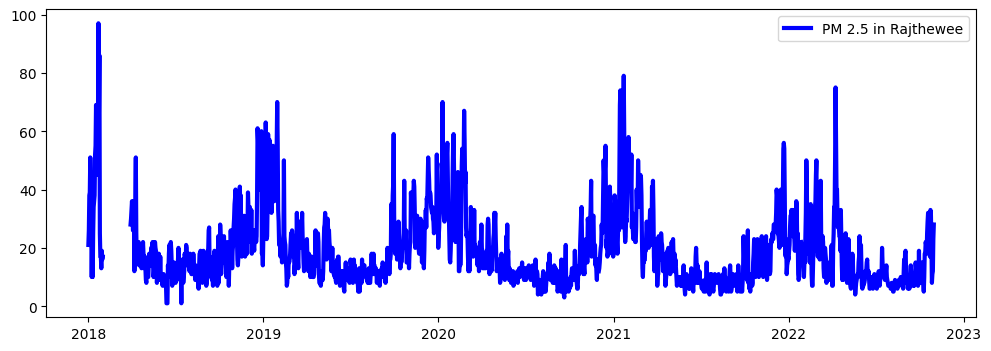

In [6]:
plt.figure(figsize=(12, 4))
plt.plot(dd, 'b', lw=3.0, label='PM 2.5 in Rajthewee')
plt.legend()
plt.show()

In [7]:
y_col='pm25'

In [8]:
df.dropna(subset=[y_col], inplace=True)
df = df.reset_index(drop=True)
df

,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1701,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1702,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1703,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1704,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [9]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pm25              1706 non-null   float64
 1   pm10              1706 non-null   float64
 2   o3                1643 non-null   float64
 3   no2               1397 non-null   float64
 4   co                1190 non-null   float64
 5   avgT              1678 non-null   float64
 6   humid             1706 non-null   float64
 7   pressure-monthly  1706 non-null   float64
 8   windDir           1676 non-null   float64
 9   windSpd           1678 non-null   float64
dtypes: float64(10)
memory usage: 133.4 KB


(1706, 10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
data_sc = sc.fit_transform(df.values)
data_sc[:11]

array([[2.08333333e-01, 2.64462810e-01, 4.61453065e-01, 2.14558750e-01,
        5.12000000e-04, 5.67567568e-01, 5.84615385e-01, 5.81486310e-01,
        2.77777778e-01, 3.47826087e-01],
       [2.60416667e-01, 3.05785124e-01, 4.65276921e-01, 3.09290344e-01,
        5.44000000e-04, 5.89189189e-01, 5.38461538e-01, 5.81486310e-01,
        3.33333333e-01, 1.30434783e-01],
       [3.85416667e-01, 4.21487603e-01, 3.57715554e-01, 4.77480472e-01,
        6.80000000e-04, 6.27027027e-01, 5.23076923e-01, 5.81486310e-01,
        1.66666667e-01, 1.30434783e-01],
       [3.95833333e-01, 4.54545455e-01, 5.50018503e-01, 3.63470168e-01,
        6.88000000e-04, 6.86486486e-01, 4.92307692e-01, 5.81486310e-01,
        9.16666667e-01, 2.17391304e-01],
       [5.20833333e-01, 5.53719008e-01, 6.01455532e-01, 6.04121655e-01,
        8.00000000e-04, 7.45945946e-01, 4.76923077e-01, 5.81486310e-01,
                   nan,            nan],
       [4.27083333e-01, 4.46280992e-01, 5.50018503e-01, 5.65065647e-01,
   

In [ ]:
n_train = int(df.shape[0] * 0.80)
n_train

1364

In [ ]:
def convertToMatrix(data, step=2):
    X, Y, = [], []
    for i in range(len(data)-step):
        d = i + step
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [ ]:
X, y = data_sc[0:n_train], data_sc[n_train:]
X.shape, y.shape

((1364, 10), (342, 10))

In [ ]:
import numpy as np

def create_X_Y(ts: list, lag: int) -> tuple:

    X, Y = [], []

    if len(ts) - lag <= 0:
        X.append(ts)
    else:
        for i in range(len(ts) - lag):
            Y.append(ts[i + lag])
            X.append(ts[i:(i + lag)])

    X, Y = np.array(X), np.array(Y)

    # Reshaping the X array to an LSTM input shape 
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, Y

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

n_layer = 50

n_lag = 3


model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))


model.compile(optimizer='adam', loss='mse')

In [ ]:
# Data wrangling
import pandas as pd
import numpy as np

# Deep learning: 
from keras.models import Sequential
from keras.layers import LSTM, Dense


class DeepModelTS():
    """
    A class to create a deep time series model
    """
    def __init__(
        self, 
        data: pd.DataFrame, 
        Y_var: str,
        lag: int,
        LSTM_layer_depth: int, 
        epochs=10, 
        batch_size=256,
        train_test_split=0
    ):

        self.data = data 
        self.Y_var = Y_var 
        self.lag = lag 
        self.LSTM_layer_depth = LSTM_layer_depth
        self.batch_size = batch_size
        self.epochs = epochs
        self.train_test_split = train_test_split

    @staticmethod
    def create_X_Y(ts: list, lag: int) -> tuple:
        """
        A method to create X and Y matrix from a time series list for the training of 
        deep learning models 
        """
        X, Y = [], []

        if len(ts) - lag <= 0:
            X.append(ts)
        else:
            for i in range(len(ts) - lag):
                Y.append(ts[i + lag])
                X.append(ts[i:(i + lag)])

        X, Y = np.array(X), np.array(Y)

        # Reshaping the X array to an LSTM input shape 
        X = np.reshape(X, (X.shape[0], X.shape[1], 1))

        return X, Y         

    def create_data_for_NN(
        self,
        use_last_n=None
        ):
        """
        A method to create data for the neural network model
        """
        # Extracting the main variable we want to model/forecast
        y = self.data[self.Y_var].tolist()

        # Subseting the time series if needed
        if use_last_n is not None:
            y = y[-use_last_n:]

        # The X matrix will hold the lags of Y 
        X, Y = self.create_X_Y(y, self.lag)

        # Creating training and test sets 
        X_train = X
        X_test = []

        Y_train = Y
        Y_test = []

        if self.train_test_split > 0:
            index = round(len(X) * self.train_test_split)
            X_train = X[:(len(X) - index)]
            X_test = X[-index:]     
            
            Y_train = Y[:(len(X) - index)]
            Y_test = Y[-index:]

        return X_train, X_test, Y_train, Y_test

    def LSTModel(self):
        """
        A method to fit the LSTM model 
        """
        # Getting the data 
        X_train, X_test, Y_train, Y_test = self.create_data_for_NN()

        # Defining the model
        model = Sequential()
        model.add(LSTM(self.LSTM_layer_depth, activation='relu', input_shape=(self.lag, 1)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')

        # Defining the model parameter dict 
        keras_dict = {
            'x': X_train,
            'y': Y_train,
            'batch_size': self.batch_size,
            'epochs': self.epochs,
            'shuffle': False
        }

        if self.train_test_split > 0:
            keras_dict.update({
                'validation_data': (X_test, Y_test)
            })

        # Fitting the model 
        model.fit(
            **keras_dict
        )

        # Saving the model to the class 
        self.model = model

        return model

    def predict(self) -> list:
        """
        A method to predict using the test data used in creating the class
        """
        yhat = []

        if(self.train_test_split > 0):
        
            # Getting the last n time series 
            _, X_test, _, _ = self.create_data_for_NN()        

            # Making the prediction list 
            yhat = [y[0] for y in self.model.predict(X_test)]

        return yhat

    def predict_n_ahead(self, n_ahead: int):
        """
        A method to predict n time steps ahead
        """    
        X, _, _, _ = self.create_data_for_NN(use_last_n=self.lag)        

        # Making the prediction list 
        yhat = []

        for _ in range(n_ahead):
            # Making the prediction
            fc = self.model.predict(X)
            yhat.append(fc)

            # Creating a new input matrix for forecasting
            X = np.append(X, fc)

            # Ommiting the first variable
            X = np.delete(X, 0)

            # Reshaping for the next iteration
            X = np.reshape(X, (1, len(X), 1))

        return yhat    

In [ ]:
# Initiating the class 
deep_learner = DeepModelTS(
data = df,
Y_var = 'pm25',
lag = 6,
LSTM_layer_depth = 50,
epochs = 60,
batch_size = 256,
train_test_split = 0.15
)

In [ ]:
model = deep_learner.LSTModel() 

Epoch 1/60
6/6 [==============================] - 5s 166ms/step - loss: 599.4990 - val_loss: 297.1786
Epoch 2/60
6/6 [==============================] - 0s 36ms/step - loss: 507.6783 - val_loss: 244.3931
Epoch 3/60
6/6 [==============================] - 0s 44ms/step - loss: 391.9033 - val_loss: 172.7896
Epoch 4/60
6/6 [==============================] - 0s 63ms/step - loss: 230.7879 - val_loss: 105.7036
Epoch 5/60
6/6 [==============================] - 0s 40ms/step - loss: 143.0508 - val_loss: 97.8883
Epoch 6/60
6/6 [==============================] - 0s 62ms/step - loss: 111.5206 - val_loss: 75.0651
Epoch 7/60
6/6 [==============================] - 0s 73ms/step - loss: 87.4746 - val_loss: 62.1173
Epoch 8/60
6/6 [==============================] - 0s 54ms/step - loss: 71.6928 - val_loss: 51.8728
Epoch 9/60
6/6 [==============================] - 0s 45ms/step - loss: 59.2190 - val_loss: 46.6746
Epoch 10/60
6/6 [==============================] - 0s 48ms/step - loss: 54.0339 - val_loss: 41.319

In [ ]:
# test พยากรณ์กราฟ
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat

8/8 [==============================] - 0s 3ms/step


In [ ]:
# test
deep_learner = DeepModelTS(
    data=df,
    Y_var='pm25',
    lag=48,
    LSTM_layer_depth=64,
    epochs=10,
    train_test_split=0
)
# Fitting the model
deep_learner.LSTModel()
# Forecasting n steps ahead
n_ahead = 7
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/10
7/7 [==============================] - 3s 96ms/step - loss: 482.9363
Epoch 2/10
7/7 [==============================] - 1s 94ms/step - loss: 181.4862
Epoch 3/10
7/7 [==============================] - 1s 97ms/step - loss: 116.3315
Epoch 4/10
7/7 [==============================] - 1s 87ms/step - loss: 79.7516
Epoch 5/10
7/7 [==============================] - 1s 96ms/step - loss: 66.9840
Epoch 6/10
7/7 [==============================] - 1s 95ms/step - loss: 59.0709
Epoch 7/10
7/7 [==============================] - 1s 93ms/step - loss: 56.8137
Epoch 8/10
7/7 [==============================] - 1s 94ms/step - loss: 51.0298
Epoch 9/10
7/7 [==============================] - 1s 94ms/step - loss: 46.6336
Epoch 10/10
1/1 [==============================] - 0s 39ms/step


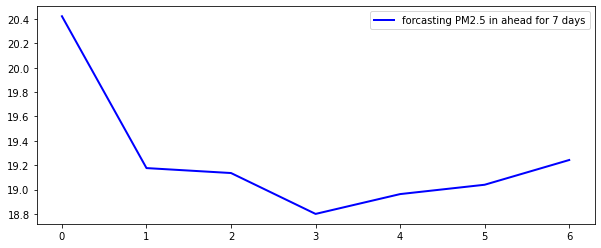

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(yhat, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [ ]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'})
ypred

,พยากรณ์ PM2.5
0,20.423201
1,19.175947
2,19.135281
3,18.799473
4,18.962322
5,19.039095
6,19.242350


In [ ]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).round(0)
ypred

,พยากรณ์ PM2.5
0,20.0
1,19.0
2,19.0
3,19.0
4,19.0
5,19.0
6,19.0


In [ ]:
ypred.mean().round(0)

พยากรณ์ PM2.5    19.0
dtype: float32

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ypred,yhat)
p_mse = mse*100
print('MSE',p_mse)
print('RMSE' , np.sqrt(p_mse))

MSE 4.717850312590599
RMSE 2.172061304979811
